In [1]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
%matplotlib inline

# Write out a sqlite version of the table #

Benedetta showed me how they were using a database to keep everything organized.  Might be a good approach for this as well.

Parent table should be just a few columns, like:
- our internal id
- RA
- DEC
- recession velocity
  - HL if available, then NSA, then AGC
- HL name
- NSA id
- AGC number
- NED name, if available

Supplemental catalogs:
- hyperleda columns
- agc columns
- NSA columns
- leroy columns
- steer+ redshift-independent distances
- local density estimates
- filament classification (distance from spine)
- CO properties
- HI properties

Further down the road:
- halpha properties
  - observed
  - detected
  - ha flux
  - ha Re

# write out version of a100+sdss according to virgo criteria #

de2000 > -35 and de2000 < 75 and  al2000 < 280./360.*24.  and al2000 > 100./360.*24. and v > 500 and v < 3300 and objtype='G'


In [47]:
#a100 = fits.getdata('/home/rfinn/research/APPSS/tables/a100-sdss-wise-nsa-gswlc.fits')
a100 = fits.getdata('/home/rfinn/research/APPSS/tables/a100-sdss-wise.fits')

(array([1217., 2119., 3511., 5575., 5458., 4851., 3808., 2996., 1344.,
         842.]),
 array([ -430. ,  1395.3,  3220.6,  5045.9,  6871.2,  8696.5, 10521.8,
        12347.1, 14172.4, 15997.7, 17823. ]),
 <a list of 10 Patch objects>)

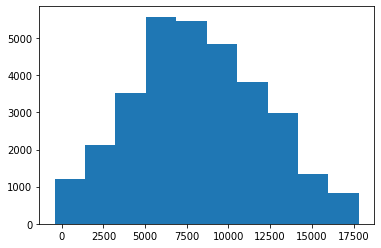

In [48]:
plt.figure()
plt.hist(a100['Vhelio'])

In [50]:
ra = a100['RAdeg_Use']
dec = a100['DECdeg_Use']
raOC = a100['RAdeg_OC']
decOC = a100['DECdeg_OC']
vel = a100['Vhelio']
# also require that an optical counterpart has been identified

flag = (dec > -35) & (dec < 75) & (ra < 280.) & (ra > 100.) & (vel > 500) & (vel < 3300)
print(sum(flag))
flag = flag & (raOC != 0) & (decOC != 0)
print(sum(flag))

2506
2369


In [51]:
a100virgo = a100[flag]
a100virgo = Table(a100virgo)
a100virgo.write('/home/rfinn/research/Virgo/tables/a100-sdss-wise-virgo.fits',format='fits',overwrite=True)

# also write out a version of kitchen sink that DOES NOT include AGC only sources #

- this will make it cleaner to describe b/c AGC is not published
- this way we can say we match to the ALFALFA A100 catalog

In [30]:
t = fits.getdata('/home/rfinn/research/Virgo/supersample/clean_kitchen_sink.fits')
agconly = t['AGCflag'] & ~t['HLflag'] & ~t['NSAflag']
print('number of AGC only = ',sum(agconly))

number of AGC only =  107


In [35]:
noagc = Table(t[t['HLflag'] | t['NSAflag']])
noagc.write('/home/rfinn/research/Virgo/tables/clean-sample-woagc.fits',format='fits',overwrite=True)
print(len(noagc))

9141


In [32]:
agconly = Table(t[agconly])
agconly.write('/home/rfinn/research/Virgo/tables/clean-sample-agconly.fits',format='fits',overwrite=True)
print(len(agconly))

107


In [34]:
len(t)

9248

# Then match a100 to virgo catalog in topcat #

- clean kitchen sink, without AGC, contains 9141 galaxies.

    - need to go back and redefine the combined RA, DEC and vel columns in kitchek sink table
      - should be HL, NSA then AGC

- A100 catalog
    - limit to region in Virgo survey
    - this is 2369 galaxies
- match Virgo to A100
    - Using RAdeg_Use, with max offset = 15arcsec and best match, tables 1 and 2, symmetric: we get 2325 pairs.  Same number of matches if we use RAdeg_OC.
    - Table 1 = clean-sample-woagc.fits
    - Table 2 = a100-sdss-wis-virgo.fits
    - Sky match, 15 arcsec
        - best match for each Table 1 row, join 1 and 2
            - 2329 pairs
        - all matches
            - 2361 pairs
        - best match, symmetric
            - 2325 pairs!
    - Did 1 or 2, Best match, symmetric
        - 2325 matches
        - 9185 rows in new catalog (9141 in clean-sample-woagc.fits)
        - so 44 new sources.  Need to review those, and then leave this as final sample.
        - saved as clean-sample-a100.fits
- match to clean sample with agc
    - Best match, symmetric, 15 arcsec
    - table 1 or 2
    - 2329 pairs, 9288 rows 
    - 9248 in clean_sample (so 40 new sources)
    - this method gives us 63 additional sources, but it seems like we end up with the same number of HI sources
    

    
            


# read in clean sample with A100 #



In [53]:
cat = fits.getdata('/home/rfinn/research/Virgo/tables/clean-sample-a100.fits')

In [74]:
print(Table(cat))

          objname            objtype ...     logSFR22_KE     Separation
---------------------------- ------- ... ------------------- ----------
PGC720745                          G ...                 nan        nan
PGC720820                          G ...                 nan        nan
PGC721308                          G ...                 nan        nan
PGC722090                          G ...                 nan        nan
PGC722221                          G ...                 nan        nan
PGC723997                          G ...                 nan        nan
PGC727168                          G ...                 nan        nan
PGC727305                          G ...                 nan        nan
PGC729818                          G ...                 nan        nan
PGC731537                          G ...                 nan        nan
                         ...     ... ...                 ...        ...
                                     ...  -1.876047927737872    

In [54]:
cat.columns

ColDefs(
    name = 'objname'; format = '28A'
    name = 'objtype'; format = 'A'
    name = 'de2000'; format = 'D'
    name = 'al2000'; format = 'D'
    name = 'v'; format = 'D'
    name = 'e_v'; format = 'D'
    name = 'vopt_1'; format = 'D'
    name = 'e_vopt'; format = 'D'
    name = 'vrad'; format = 'D'
    name = 'e_vrad'; format = 'D'
    name = 'bt'; format = 'D'
    name = 'e_bt'; format = 'D'
    name = 'type_1'; format = '4A'
    name = 'bar'; format = 'A'
    name = 'ring'; format = 'A'
    name = 'multiple'; format = 'A'
    name = 'compactness'; format = 'A'
    name = 't'; format = 'D'
    name = 'e_t'; format = 'D'
    name = 'logd25'; format = 'D'
    name = 'e_logd25'; format = 'D'
    name = 'logr25'; format = 'D'
    name = 'e_logr25'; format = 'D'
    name = 'pa'; format = 'D'
    name = 'incl'; format = 'D'
    name = 'logdc'; format = 'D'
    name = 'btc'; format = 'D'
    name = 'itc'; format = 'D'
    name = 'ubtc'; format = 'D'
    name = 'bvtc'; format = 'D'
 

## published table ##

- RA, DEC, velocity, our id, HL name, NSA id, A100 name
- coordinates - 
  - HL, NSA, then A100
- NED name
- unWISE quantities, stellar mass and SFR
- SGX, SGY, SGZ
- closest filament
- distance to filament

## internal catalog ##

In [ ]:
# published catalog

# make HL flag

# make NSA flag

# make A100 flag

# ra = RA_HL , then RA_NSA, then RA A100

In [55]:
from astroquery.ned import Ned


In [81]:
result_table = Ned.query_object("NGC 224")

In [82]:
print(result_table['Object Name','RA','DEC'])

Object Name     RA        DEC    
             degrees    degrees  
----------- ---------- ----------
MESSIER 031   10.68479   41.26906


In [99]:
result_table['Object Name'][0]

'MESSIER 031'

In [100]:
t = np.array(result_table['Object Name'][0])

In [102]:
print(t.dtype)

<U11


In [89]:
x=[]
for i in range(3):
    x.append(result_table['Object Name'])
print(x)
x = np.array(x)
print(x.dtype)

[<MaskedColumn name='Object Name' dtype='bytes30' description='NED preferred name for the object' length=1>
MESSIER 031, <MaskedColumn name='Object Name' dtype='bytes30' description='NED preferred name for the object' length=1>
MESSIER 031, <MaskedColumn name='Object Name' dtype='bytes30' description='NED preferred name for the object' length=1>
MESSIER 031]
|S30


In [64]:
cat['objname'][0]

'PGC720745'

In [71]:
combo_name = cat['objname']*cat['HLflag'] + cat['NSAID']

0

In [104]:
NEDid = np.zeros(len(cat),dtype='S60')
NEDid = []
for i in range(50):
    # check if HL id exists, look up NED name
    # if yes, break
    # if no NED comes back
    # check if NSA ID exists for that galaxy. if yes, look up NED name
    # if NED name is found, break
    # if no NED name comes back
    # check if A100 ID exists for that galaxy. if yes, look up NED name
    # if no NED name comes back, then no NED name!
    if cat['HLflag'][i]:
        pass
    elif cat['NSAflag']
        t = Ned.query_object(cat['objname'][i])
    #NEDid[i] = str(t['Object Name'][0]).rstrip()
    try:
        NEDid.append(t['Object Name'][0])
    except IndexError:
        NEDid.append('')

In [105]:
NEDid

['',
 '2MASX J12083457-3008549',
 'GALEXASC J130225.53-300632.6',
 'WISEA J120521.43-300245.9',
 'WISEA J132013.97-300210.6',
 '',
 'WISEA J113231.73-293710.4',
 '',
 '',
 'WISEA J142110.39-291504.7',
 '',
 '',
 '2MASX J14450161-2853052',
 '2MASS J15372939-2853067',
 'WISEA J093846.03-284208.1',
 'WISEA J120346.76-284014.7',
 'LCSB S0995P',
 '',
 'WISEA J103632.46-282159.1',
 'WISEA J130056.11-282110.8',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'WISEA J065104.12-275632.2',
 '',
 'WISEA J101025.43-275212.9',
 'WISEA J124213.30-275210.6',
 '',
 'SDSS J143956.60-004439.3',
 'AM 1130-272',
 'WISEA J103455.93-273823.9',
 '',
 '',
 'WISEA J120157.57-272613.4',
 '',
 '2MASX J09512225-2720180',
 '',
 '',
 '',
 'WISEA J103540.95-265822.5',
 '',
 'WISEA J111419.99-265447.5',
 '2MASS J11505446-2654260',
 'AM 1316-263',
 'WISEA J103817.73-264641.3',
 '2MFGC 08182']

# Scratch work on how to merge class=4 sources efficiently #

going to reassign range of columns from child to parent

for HL, columns a:b

In [106]:
t = fits.getdata('/home/rfinn/research/Virgo/supersample/smart_kitchen_sink.fits')


In [112]:
T = Table(t)

In [151]:
T.colnames[90:200]

['IAUNAME',
 'SUBDIR',
 'RA_2',
 'DEC_2',
 'ISDSS',
 'INED',
 'ISIXDF',
 'IALFALFA',
 'IZCAT',
 'ITWODF',
 'MAG',
 'Z',
 'ZSRC',
 'SIZE',
 'RUN',
 'CAMCOL',
 'FIELD',
 'RERUN',
 'XPOS',
 'YPOS',
 'NSAID',
 'ZDIST',
 'SERSIC_NMGY',
 'SERSIC_NMGY_IVAR',
 'SERSIC_OK',
 'SERSIC_RNMGY',
 'SERSIC_ABSMAG',
 'SERSIC_AMIVAR',
 'EXTINCTION',
 'SERSIC_KCORRECT',
 'SERSIC_KCOEFF',
 'SERSIC_MTOL',
 'SERSIC_B300',
 'SERSIC_B1000',
 'SERSIC_METS',
 'SERSIC_MASS',
 'XCEN',
 'YCEN',
 'NPROF',
 'PROFMEAN',
 'PROFMEAN_IVAR',
 'QSTOKES',
 'USTOKES',
 'BASTOKES',
 'PHISTOKES',
 'PETRO_FLUX',
 'PETRO_FLUX_IVAR',
 'FIBER_FLUX',
 'FIBER_FLUX_IVAR',
 'PETRO_BA50',
 'PETRO_PHI50',
 'PETRO_BA90',
 'PETRO_PHI90',
 'SERSIC_FLUX',
 'SERSIC_FLUX_IVAR',
 'SERSIC_N',
 'SERSIC_BA',
 'SERSIC_PHI',
 'ASYMMETRY',
 'CLUMPY',
 'DFLAGS',
 'AID',
 'PID',
 'DVERSION',
 'PROFTHETA',
 'PETRO_THETA',
 'PETRO_TH50',
 'PETRO_TH90',
 'SERSIC_TH50',
 'PLATE',
 'FIBERID',
 'MJD',
 'RACAT',
 'DECCAT',
 'ZSDSSLINE',
 'SURVEY',
 'PROGRAM

In [140]:
np.arange(44,83).dtype

dtype('int64')

In [152]:
os.chdir('/home/rfinn/research/Virgo/supersample/')

In [209]:
%run ~/github/Virgo/programs/clean_kitchen_sink.py

parents =  9311
len(parentid) =  1
9311 [9311] 1045
False True [9311] 1
parents =  1586.0
len(parentid) =  1
1586.0 [1586] 3472
True True [1586] 1
parents =  9695.0
len(parentid) =  1
9695.0 [9695] 5280
False True [9695] 1
parents =  6546.0
len(parentid) =  1
6546.0 [6546] 5282
True True [6546] 1
parents =  9305.0
len(parentid) =  1
9305.0 [9305] 6657
False True [9305] 1
parents =  9348.0
len(parentid) =  1
9348.0 [9348] 6662
False True [9348] 1
parents =  --


/home/rfinn/github/Virgo/programs/clean_kitchen_sink.py:51: UserWarning: Warning: converting a masked element to nan.
  parentflag = self.byeye['galnumber'] == int(float(parents[i]))


ValueError: cannot convert float NaN to integer

# Found a few entries that had class=4 but no parent identified.  Need to look at cutouts for:

| Gal id | class | parent | new class | explanation |
|--------|-------|--------|-----------|-------------|
|8934 | 4 | N/A | 1 | looked like multiple sources but only one |
|9017 | 4 | N/A | 1 | same as above |
|9565 | 4 | 6303 | N/A| coords are offset, but vel is same |
|9715 | 4 | 7765 | N/A| coords the same, but HL and NSA have BIG vel offset (1800 vs 3149) |

Then:
- update entry in google spreadsheet
- download spreadsheet
- collate the multiple sheets into one spreadsheet

In [210]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 
 
 OR
	 s.run_it()


To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


In [211]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  9999


cutout image size is  60
8934 :  [8934]
cutout image size is  60
9017 :  [9017]
cutout image size is  60
9565 :  [6303, 9565]
cutout image size is  60
9715 :  [7765, 9715]


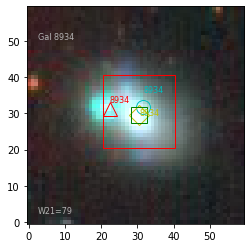

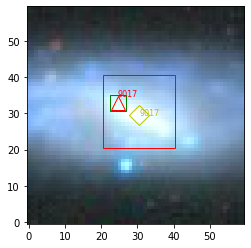

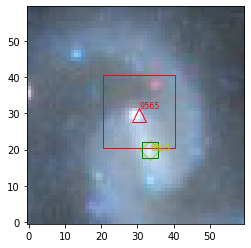

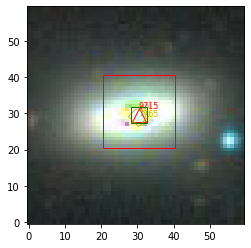

In [214]:
ids = [8934, 9017, 9565, 9715]
for i in ids:
    a = t.one_gal(i,imsize=60,dssflag=False)
    print(i,': ',a)

# rerunning clean kitchen sink #

In [220]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py

1045 parents =  9311
9311 [9311] 1045
3472 parents =  1586.0
1586.0 [1586] 3472
5280 parents =  9695.0
9695.0 [9695] 5280
5282 parents =  6546.0
6546.0 [6546] 5282
6657 parents =  9305.0
9305.0 [9305] 6657
6662 parents =  9348.0
9348.0 [9348] 6662
9349 parents =  5265.0
5265.0 [5265] 9349
9378 parents =  1985.0
1985.0 [1985] 9378
9408 parents =  3104.0
3104.0 [3104] 9408
9411 parents =  1904.0
1904.0 [1904] 9411
9449 parents =  1832.0
1832.0 [1832] 9449
9565 parents =  6303.0
6303.0 [6303] 9565
9585 parents =  7543.0
7543.0 [7543] 9585
9623 parents =  5285.0
5285.0 [5285] 9623
9677 parents =  6661.0
6661.0 [6661] 9677
9689 parents =  9689.0
9689.0 [9689] 9689
9694 parents =  4429.0
4429.0 [4429] 9694
9710 parents =  7754.0
7754.0 [7754] 9710
9715 parents =  7765.0
7765.0 [7765] 9715
9738 parents =  5687.0
5687.0 [5687] 9738
9745 parents =  7391.0
7391.0 [7391] 9745
9747 parents =  5293.0
5293.0 [5293] 9747
9748 parents =  6910.0
6910.0 [6910] 9748
9754 parents =  3121.0
3121.0 [3121] 9

Looks like merging for class 4 objects proceeded without error.  Should check a few by comparing smart_kitchen_sink.fits with clean_kitchen_sink.fits

In [223]:
c.kitchen[9331]

objname,objtype,de2000,al2000,v,e_v,vopt_1,e_vopt,vrad,e_vrad,bt,e_bt,type,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt,RAdeg,AGCnr,which,radeg,decdeg,a,b,zmag,inccode,posang,description,bsteintype,vopt_2,verr,extrc3,extdirbe,vsource,ngcic,hiflux,rms,v21,width,widtherr,widthcode,telcode,detcode,hisource,statuscode,snr,ibandqual,ibandsrc,irasflag,icluster,hidata,iposition,ipalomar,rc3flag,irotcat,newstuff,vhelagc,RA_1,DEC_1,HLflag,AGCflag,RA-HL-AGC,DEC-HL-AGC,HL-AGC-VEL,IAUNAME,SUBDIR,RA_2,DEC_2,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY [7],SERSIC_NMGY_IVAR [7],SERSIC_OK,SERSIC_RNMGY [7],SERSIC_ABSMAG [7],SERSIC_AMIVAR [7],EXTINCTION [7],SERSIC_KCORRECT [7],SERSIC_KCOEFF [5],SERSIC_MTOL [7],SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETRO_FLUX [7],PETRO_FLUX_IVAR [7],FIBER_FLUX [7],FIBER_FLUX_IVAR [7],PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX [7],SERSIC_FLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX [7],ELPETRO_FLUX_IVAR [7],ELPETRO_TH50 [7],ELPETRO_TH90 [7],ELPETRO_APCORR_R,ELPETRO_APCORR [7],ELPETRO_APCORR_SELF [7],ELPETRO_NMGY [7],ELPETRO_NMGY_IVAR [7],ELPETRO_OK,ELPETRO_RNMGY [7],ELPETRO_ABSMAG [7],ELPETRO_AMIVAR [7],ELPETRO_KCORRECT [7],ELPETRO_KCOEFF [5],ELPETRO_MASS,ELPETRO_MTOL [7],ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS,NSAflag,RA-COMBINED,DEC-COMBINED,HL-AGC-NSA-VEL,galnumber
str28,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str1,str1,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str1,float64,float64,float64,float64,float64,int64,int64,str8,int64,int64,int64,int64,int64,int64,str8,float64,float64,int64,int64,int64,str4,str1,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,bool,bool,float32,float32,float32,str19,str27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,str7,float32,int16,uint8,int16,str3,float32,float32,int32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,str8,float32,float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,str6,str27,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,bool,float32,float32,float32,int64
,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,739030,N,141.893341,18.445555,0.19,0.12,17.1,0,159,N/A,420,1438,36,0,0,-98,N/A,0.0,0.0,0,0,0,N/A,0,0,0,0,0.0,0,0,0,0,0,8,0,0,0,0,1438,141.893341,18.445555,False,True,141.89334,18.445555,1438.0,,,0.0,0.0,0,0,0,0,0,0,0.0,0.0,,0.0,0,0,0,,0.0,0.0,0,0.0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 ..

# Fixing 8822 # 

In [225]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py
t = fulltable()

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 
 
 OR
	 s.run_it()


To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )
LENGTH GALIDS_IN_FOV =  9999


<Figure size 432x288 with 0 Axes>

cutout image size is  60
8822 :  [8822]


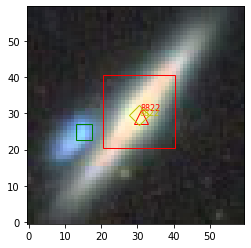

In [226]:
ids = [8822]
for i in ids:
    a = t.one_gal(i,imsize=60,dssflag=False)
    print(i,': ',a)

The blue source is the CO target, but the intention was for the 8822.

In [228]:
t.t['objname'][8822]

'UGC08656'

so this source is ok.  We need to add the blue source in the catalog.

The blue galaxy is UGC8656 NOTES01

In [229]:
test = np.zeros_like(t.t[0])

In [233]:
test.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [234]:
t.t.colnames

AttributeError: recarray has no attribute colnames